## News Trends

### 추준호(20224224)

In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [3]:
query = {
  "size": 0,
  "aggs":{
    "group_by_date": {
      "date_histogram":{
        "field":"created_at",
        "interval":"day"
      }
    }
  }
}

In [4]:
query = json.dumps(query)

In [5]:
headers = {
    'Content-type': 'application/json'
}

In [6]:
resp = requests.get(
    f'{ELASTICSEARCH_URL}/news/_search',
    headers = headers,
    data = query,
    auth = ELASTICSEARCH_AUTH
)

In [7]:
resp.status_code

200

In [9]:
results = resp.json()

In [11]:
buckets = results['aggregations']['group_by_date']['buckets']

In [14]:
df = pd.DataFrame(buckets)

In [16]:
df['date'] = pd.to_datetime(df['key_as_string'])

In [17]:
df = df.set_index('date')

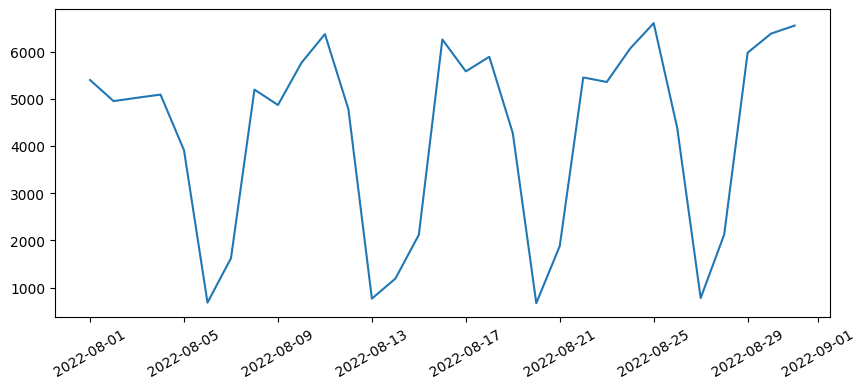

In [19]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.plot(df['doc_count'])
plt.xticks(rotation=30)
plt.show()

In [28]:
query2 = {
  "query": {
    "match":{
      "body": "부동산"
    }
  },
  "size": 0,
  "aggs":{
    "group_by_date": {
      "date_histogram":{
        "field":"created_at",
        "interval":"day"
      }
    }
  }
}

In [29]:
query2 = json.dumps(query2)

In [30]:
resp2 = requests.get(
    f'{ELASTICSEARCH_URL}/news/_search',
    headers = headers,
    data = query2,
    auth = ELASTICSEARCH_AUTH
)

In [31]:
results2 = resp2.json()
buckets2 = results2['aggregations']['group_by_date']['buckets']
df2 = pd.DataFrame(buckets2)
df2['date'] = pd.to_datetime(df2['key_as_string'])
df2 = df2.set_index('date')

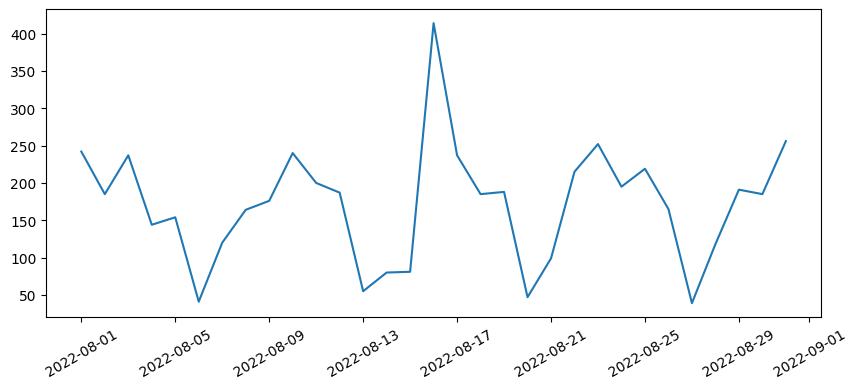

In [32]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.plot(df2['doc_count'])
plt.xticks(rotation=30)
plt.show()